In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
import random, shutil
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.applications import VGG16, VGG19,DenseNet169, DenseNet121
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras as K
from tensorflow import keras   
import matplotlib as mpl
from collections import Counter
import glob
import itertools 
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

source_edge = r"C:\Users\ahmad\Desktop\Galaxies\Whole\edge"
source_spiral = r"C:\Users\ahmad\Desktop\Galaxies\Whole\spiral"
source_smooth = r"C:\Users\ahmad\Desktop\Galaxies\Whole\smooth"
dest_edge = r"C:\Users\ahmad\Desktop\Galaxies\train\edge"
dest_spiral = r"C:\Users\ahmad\Desktop\Galaxies\train\spiral"
dest_smooth = r"C:\Users\ahmad\Desktop\Galaxies\train\smooth"

#for training set
for i in range(2600):
    #Variable random_file stores the name of the random file chosen
    random_file1=random.choice(os.listdir(source_edge))
    #print("%d} %s"%(i+1,random_file1))
    source_file1="%s/%s"%(source_edge,random_file1)
    dest_file1=dest_edge
    #to moves file from one directory to another
    shutil.copy(source_file1,dest_file1)
    
for i in range(4000):
    random_file2=random.choice(os.listdir(source_spiral))
    #print("%d} %s"%(i+1,random_file2))
    source_file2="%s/%s"%(source_spiral,random_file2)
    dest_file2=dest_spiral
    #to moves file from one directory to another
    shutil.copy(source_file2,dest_file2)
    
for i in range(4400):
    random_file3=random.choice(os.listdir(source_smooth))
    #print("%d} %s"%(i+1,random_file3))
    source_file3="%s/%s"%(source_smooth,random_file3)
    dest_file3=dest_smooth
    #to moves file from one directory to another
    shutil.copy(source_file3,dest_file3)

print("\n\n"+"$"*33+"[ Files Moved Successfully ]"+"$"*33)



$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$[ Files Moved Successfully ]$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [3]:

#for test set
source_edge = r"C:\Users\ahmad\Desktop\Galaxies\train\edge"
source_spiral = r"C:\Users\ahmad\Desktop\Galaxies\train\spiral"
source_smooth = r"C:\Users\ahmad\Desktop\Galaxies\train\smooth"
dest_edge = r"C:\Users\ahmad\Desktop\Galaxies\test\edge"
dest_spiral = r"C:\Users\ahmad\Desktop\Galaxies\test\spiral"
dest_smooth = r"C:\Users\ahmad\Desktop\Galaxies\test\smooth"

for i in range(150):
    #Variable random_file stores the name of the random file chosen
    random_file1=random.choice(os.listdir(source_edge))
    #print("%d} %s"%(i+1,random_file1))
    source_file1="%s/%s"%(source_edge,random_file1)
    dest_file1=dest_edge
    #to moves file from one directory to another
    shutil.move(source_file1,dest_file1)
    
for i in range(200):
    random_file2=random.choice(os.listdir(source_spiral))
    #print("%d} %s"%(i+1,random_file2))
    source_file2="%s/%s"%(source_spiral,random_file2)
    dest_file2=dest_spiral
    #to moves file from one directory to another
    shutil.move(source_file2,dest_file2)
    
for i in range(250):
    random_file3=random.choice(os.listdir(source_smooth))
    #print("%d} %s"%(i+1,random_file3))
    source_file3="%s/%s"%(source_smooth,random_file3)
    dest_file3=dest_smooth
    #to moves file from one directory to another
    shutil.move(source_file3,dest_file3)

print("\n\n"+"$"*33+"[ Files Moved Successfully ]"+"$"*33)




$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$[ Files Moved Successfully ]$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [2]:

#loading training, validation , test sets
directory1 = '/kaggle/working/train'
BATCH_SIZE = 64
IMG_SIZE = (210, 210)
input_shape = IMG_SIZE + (3,)


class_names  =['spiral','smooth', 'edge']
train_directory = r"C:\Users\ahmad\Desktop\Galaxies\train"
test_directory = r"C:\Users\ahmad\Desktop\Galaxies\test"
train_ds = image_dataset_from_directory(train_directory,
                                             label_mode='categorical',
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.3,
                                             subset='training',
                                             seed=42,
                                             labels= "inferred",
                                             class_names= class_names)
validation_ds  = image_dataset_from_directory(train_directory,
                                                  label_mode='categorical',
                                                 shuffle=True,
                                                 batch_size=BATCH_SIZE,
                                                 image_size=IMG_SIZE,
                                                 validation_split=0.3,
                                                 subset='validation',
                                                 seed=42,
                                                 labels= "inferred",
                                                 class_names= class_names)

test_ds  = image_dataset_from_directory(test_directory,
                                            label_mode='categorical',
                                            shuffle=True,
                                            batch_size=BATCH_SIZE,
                                            image_size=IMG_SIZE,
                                            seed=42,
                                            labels= "inferred",
                                            class_names= class_names)

class_names = train_ds.class_names
print(class_names)

Found 10405 files belonging to 3 classes.
Using 7284 files for training.
Found 10405 files belonging to 3 classes.
Using 3121 files for validation.
Found 600 files belonging to 3 classes.
['spiral', 'smooth', 'edge']


In [3]:
train_filenames = glob.glob('C:/Users/ahmad/Desktop/Galaxies/train/*/*')
test_filenames = glob.glob('C:/Users/ahmad/Desktop/Galaxies/test/*/*')
rand_image = [train_filenames[i] for i in np.random.randint(len(train_filenames), size=10)]

print(rand_image[0:2])
print(len(train_filenames))
print(len(test_filenames))


train_labels = []
for filename in train_filenames:
    if "spiral" in filename:
        train_labels.append("spiral")
    elif "smooth" in filename:
        train_labels.append("smooth")
    elif "edge" in filename:
        train_labels.append("edge")

print(Counter(train_labels).keys() )# equals to list(set(words))
print(Counter(train_labels).values()) # counts the elements' frequency  
print(Counter(train_labels)['spiral'])  
print(Counter(train_labels)['smooth'])
print(Counter(train_labels)['edge'])

['C:/Users/ahmad/Desktop/Galaxies/train\\edge\\edge.912041.jpg', 'C:/Users/ahmad/Desktop/Galaxies/train\\smooth\\smooth.433478.jpg']
10405
600
dict_keys(['edge', 'smooth', 'spiral'])
dict_values([2455, 4150, 3800])
3800
4150
2455


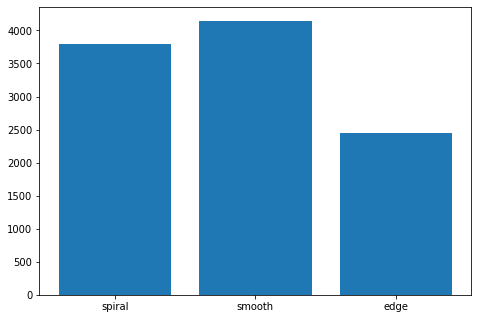

<Figure size 432x288 with 0 Axes>

In [4]:
#data destribution bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['spiral', 'smooth', 'edge']
numbers = [Counter(train_labels)['spiral'], Counter(train_labels)['smooth'],Counter(train_labels)['edge']]
ax.bar(labels,numbers)
plt.show()
plt.savefig(r"C:\Users\ahmad\Desktop\Galaxies\image8.png")


In [5]:
test_labels = []
for filename in test_filenames:
    if "spiral" in filename:
        test_labels.append("spiral")
    elif "smooth" in filename:
        test_labels.append("smooth")
    elif "edge" in filename:
        test_labels.append("edge")
        
print(Counter(test_labels).keys() )# equals to list(set(words))
print(Counter(test_labels).values()) # counts the elements' frequency   
print(Counter(test_labels)['spiral']) 
print(Counter(test_labels)['smooth'])
print(Counter(test_labels)['edge'])

dict_keys(['edge', 'smooth', 'spiral'])
dict_values([150, 250, 200])
200
250
150


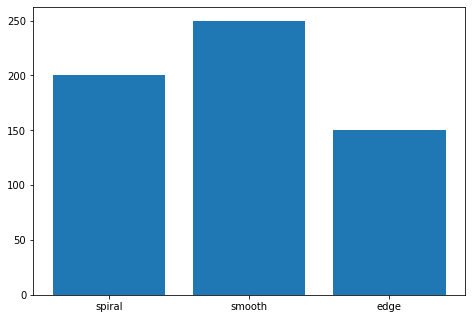

<Figure size 432x288 with 0 Axes>

In [6]:
#test data destribution bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['spiral', 'smooth', 'edge']
numbers = [Counter(test_labels)['spiral'], Counter(test_labels)['smooth'],Counter(test_labels)['edge']]
ax.bar(labels,numbers)
plt.show()
plt.savefig(r"C:\Users\ahmad\Desktop\Galaxies\image8.png")

Populating the interactive namespace from numpy and matplotlib


C:\Users\ahmad\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


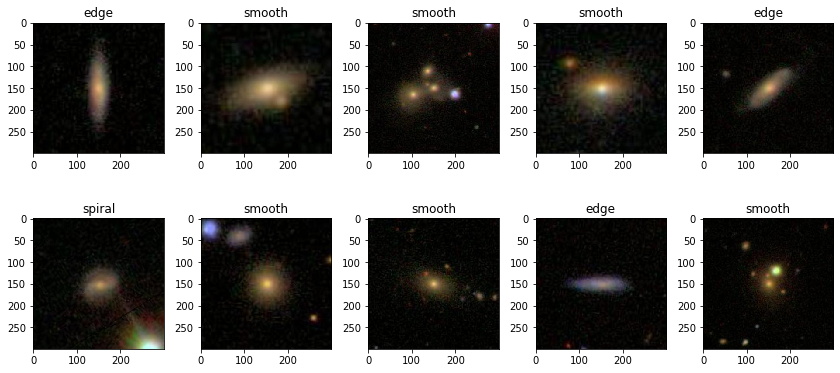

In [7]:

label = []
for filename in rand_image:
    if "spiral" in filename:
        label.append("spiral")
    elif "smooth" in filename:
        label.append("smooth")
    elif "edge" in filename:
        label.append("edge")
        
        
%pylab inline
fig, axs = plt.subplots(2,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):

    axs[i].imshow(mpimg.imread(rand_image[i]))
    axs[i].set_title(label[i])
plt.savefig(r"C:\Users\ahmad\Desktop\Galaxies\image0.png")

In [8]:

#declaring metrics
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
#      tf.keras.metrics.AUC(name='auc'),
]          

In [9]:
#defining data augmentation
data_augmentation =tf. keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('vertical'),
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.35),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.15),
])

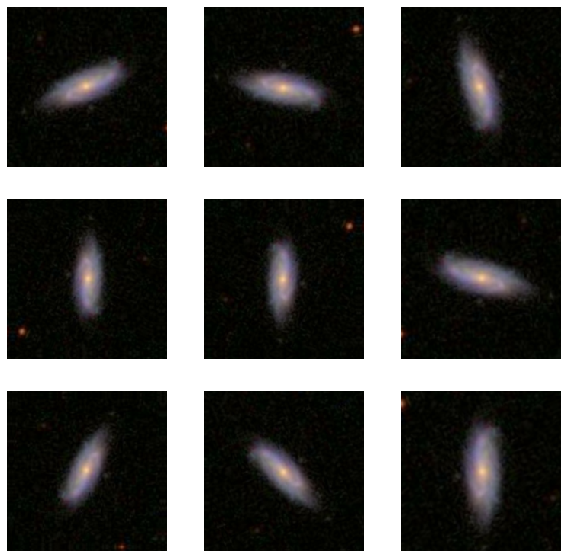

In [10]:
for image, _ in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[29]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')
plt.savefig(r"C:\Users\ahmad\Desktop\Galaxies\image2.png")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)


preprocess_input = tf.keras.applications.mobilenet.preprocess_input

In [12]:
def Galaxy():
    base_model = tf.keras.applications.MobileNet(
    weights="imagenet",
    input_shape=input_shape,
    include_top=False,
     )
# to Freeze the base_model
    base_model.trainable = False
    
    inputs = tf.keras.Input(shape=input_shape)
    
    x = data_augmentation(inputs)
    
    x = preprocess_input(x)
    
    norm_layer = tf.keras.layers.experimental.preprocessing.Normalization()
    
    x = norm_layer(x)
    
    x = base_model(x, training=False)
    
    x = keras.layers.GlobalAveragePooling2D()(x)
    
    x = keras.layers.Dropout(0.2)(x)
    
    x = tfl.Dense(128, activation=('relu'))(x)

    x = tfl.Dropout(0.2)(x)

    outputs = tf.keras.layers.Dense(units=3, activation = 'softmax')(x)
    
    model = tf.keras.Model(inputs, outputs)
    
    return model

# Create a basic model instance
model = Galaxy()

# Display the model's architecture
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 210, 210, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 210, 210, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda  (None, 210, 210, 3)       0         
)                                                                
_________________________________________________________________
tf.math.subtract (TFOpLambd  (None, 210, 210, 3)       0         
a)                                                               
_________________________________________________________________
normalization (Normalizatio  (None, 210, 210, 3)       7         
n)                                                               
_____________________________________________________________

In [13]:
keras.utils.plot_model(model, show_shapes=True)
plt.savefig(r"C:\Users\ahmad\Desktop\Galaxies\image3.png")

<Figure size 432x288 with 0 Axes>

In [14]:
weight_for_0 = (1 / Counter(train_labels)['spiral'])*(len(train_labels))/3.0
weight_for_1 = (1 / Counter(train_labels)['smooth'])*(len(train_labels))/3.0
weight_for_2 = (1 / Counter(train_labels)['edge'])*(len(train_labels))/3.0

class_weight = {0: weight_for_0 , 1: weight_for_1 , 2: weight_for_2}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))
print('Weight for class 2: {:.2f}'.format(weight_for_2))

Weight for class 0: 0.91
Weight for class 1: 0.84
Weight for class 2: 1.41


In [15]:
checkpoint_p= "C:/Users/ahmad/Desktop/Galaxies/"
checkpoint_path = os.path.join(checkpoint_p, "cp.ckpt")
checkpoint_dir = os.path.dirname(checkpoint_path)
callback = []
def scheduler(epoch, lr):
    return lr * tf.math.exp(-0.1)
callback += [K.callbacks.LearningRateScheduler(scheduler, verbose=1)]
callback += [K.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                         save_best_only=True,
                                         monitor='val_accuracy',
                                         mode='max',
                                         verbose=1
                                         )]

In [16]:
opt= keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=METRICS)


In [17]:
initial_epoch = 8
history_1 = model.fit(train_ds,
                      batch_size=BATCH_SIZE,
                      class_weight=class_weight,
                      validation_data=validation_ds,
                      epochs=initial_epoch, shuffle=True,
                      callbacks=callback,
                      verbose=1
                          )

Epoch 1/8

Epoch 00001: LearningRateScheduler setting learning rate to tf.Tensor(0.0009048374, shape=(), dtype=float32).
114/114 [==============================] - 20s 144ms/step - loss: 0.5875 - accuracy: 0.8378 - precision: 0.7785 - recall: 0.7176 - val_loss: 0.4598 - val_accuracy: 0.8798 - val_precision: 0.8351 - val_recall: 0.7969

Epoch 00001: val_accuracy improved from -inf to 0.87985, saving model to C:/Users/ahmad/Desktop/Galaxies\cp.ckpt
INFO:tensorflow:Assets written to: C:/Users/ahmad/Desktop/Galaxies\cp.ckpt\assets
Epoch 2/8

Epoch 00002: LearningRateScheduler setting learning rate to tf.Tensor(0.0008187307, shape=(), dtype=float32).
114/114 [==============================] - 14s 124ms/step - loss: 0.4816 - accuracy: 0.8649 - precision: 0.8149 - recall: 0.7694 - val_loss: 0.4511 - val_accuracy: 0.8825 - val_precision: 0.8424 - val_recall: 0.7965

Epoch 00002: val_accuracy improved from 0.87985 to 0.88252, saving model to C:/Users/ahmad/Desktop/Galaxies\cp.ckpt
INFO:tensorfl

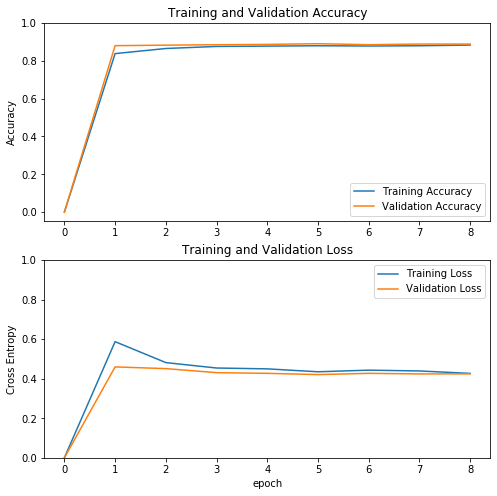

<Figure size 432x288 with 0 Axes>

In [18]:
acc = [0.] + history_1.history['accuracy']
val_acc = [0.] + history_1.history['val_accuracy']

loss =[0.] + history_1.history['loss']
val_loss =[0.] + history_1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
plt.savefig("C:/Users/ahmad/Desktop/Galaxies/image4.png")

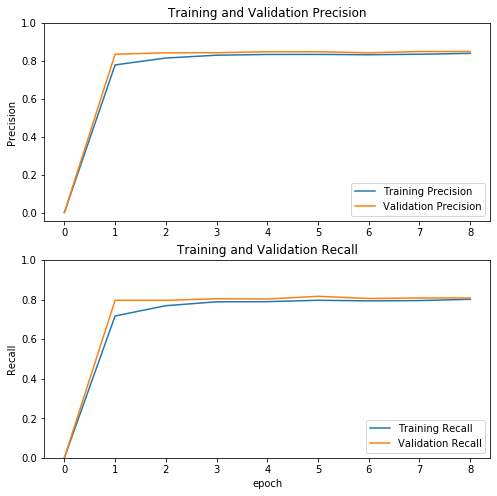

<Figure size 432x288 with 0 Axes>

In [19]:
prec = [0.] + history_1.history['precision']
val_prec = [0.] + history_1.history['val_precision']

recall =[0.] + history_1.history['recall']
val_recall =[0.] + history_1.history['val_recall']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(prec, label='Training Precision')
plt.plot(val_prec, label='Validation Precision')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Precision')

plt.subplot(2, 1, 2)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([0,1])
plt.title('Training and Validation Recall')
plt.xlabel('epoch')
plt.show()
plt.savefig("C:/Users/ahmad/Desktop/Galaxies/image4.png")

In [21]:
base_model = model.layers[5]
model.trainable = True
for layer in base_model.layers[:-8]:
    layer.trainable = False
    
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 210, 210, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 210, 210, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda  (None, 210, 210, 3)       0         
)                                                                
_________________________________________________________________
tf.math.subtract (TFOpLambd  (None, 210, 210, 3)       0         
a)                                                               
_________________________________________________________________
normalization (Normalizatio  (None, 210, 210, 3)       7         
n)                                                               
_____________________________________________________________

In [22]:
fine_tune_epochs = 14
total_epochs = initial_epoch + fine_tune_epochs
opt= keras.optimizers.Adam(learning_rate=0.0006)
model.compile(optimizer=opt, loss='categorical_crossentropy',
              metrics=METRICS)

In [23]:
history_2 = model.fit(train_ds,
                      batch_size=BATCH_SIZE,
                      class_weight=class_weight,
                      validation_data=validation_ds,
                      epochs=total_epochs, shuffle=True,
                      initial_epoch=history_1.epoch[-1],
                      callbacks=callback,
                      verbose=1
                          )

Epoch 8/22

Epoch 00008: LearningRateScheduler setting learning rate to tf.Tensor(0.00054290245, shape=(), dtype=float32).
114/114 [==============================] - 17s 135ms/step - loss: 0.6255 - accuracy: 0.8417 - precision: 0.7835 - recall: 0.7256 - val_loss: 0.5992 - val_accuracy: 0.8484 - val_precision: 0.7924 - val_recall: 0.7389

Epoch 00008: val_accuracy did not improve from 0.89021
Epoch 9/22

Epoch 00009: LearningRateScheduler setting learning rate to tf.Tensor(0.00049123843, shape=(), dtype=float32).
114/114 [==============================] - 15s 132ms/step - loss: 0.5181 - accuracy: 0.8576 - precision: 0.8059 - recall: 0.7545 - val_loss: 0.4403 - val_accuracy: 0.8883 - val_precision: 0.8478 - val_recall: 0.8103

Epoch 00009: val_accuracy did not improve from 0.89021
Epoch 10/22

Epoch 00010: LearningRateScheduler setting learning rate to tf.Tensor(0.0004444909, shape=(), dtype=float32).
114/114 [==============================] - 15s 132ms/step - loss: 0.4771 - accuracy: 0.

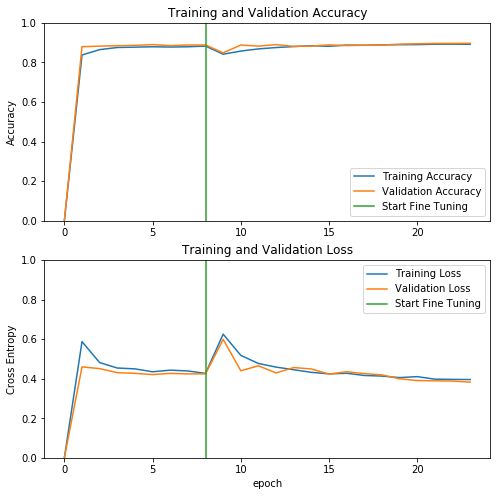

<Figure size 432x288 with 0 Axes>

In [24]:
acc += history_2.history['accuracy']
val_acc += history_2.history['val_accuracy']

loss += history_2.history['loss']
val_loss += history_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epoch,initial_epoch],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1])
plt.plot([initial_epoch,initial_epoch],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()
plt.savefig('C:/Users/ahmad/Desktop/Galaxies/image5.png')


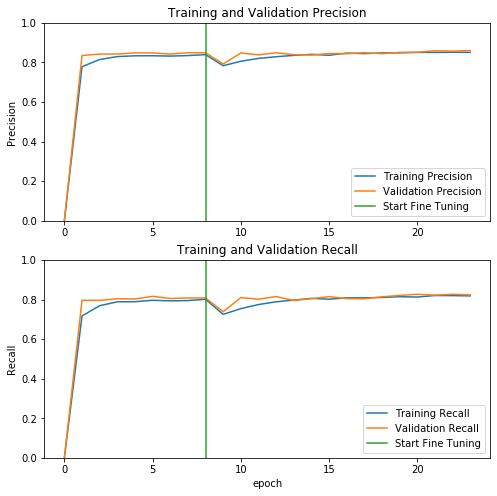

<Figure size 432x288 with 0 Axes>

In [25]:
prec += history_2.history['precision']
val_prec += history_2.history['val_precision']

recall += history_2.history['recall']
val_recall += history_2.history['val_recall']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(prec, label='Training Precision')
plt.plot(val_prec, label='Validation Precision')
plt.ylim([0, 1])
plt.plot([initial_epoch,initial_epoch],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')

plt.subplot(2, 1, 2)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.ylim([0, 1])
plt.plot([initial_epoch,initial_epoch],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.xlabel('epoch')
plt.show()
plt.savefig('C:/Users/ahmad/Desktop/Galaxies/image5.png')

In [26]:
model.evaluate(test_ds)

10/10 [==============================] - 1s 126ms/step - loss: 0.4016 - accuracy: 0.8872 - precision: 0.8476 - recall: 0.8067


[0.4016488790512085, 0.887222170829773, 0.8476357460021973, 0.8066666722297668]

In [27]:
model.save_weights('C:/Users/ahmad/Desktop/Galaxies/weights.h5')
model.save('C:/Users/ahmad/Desktop/Galaxies/model.h5')

In [28]:
# Evaluate the restored model on the valdatio set
loss,accuracy,precision,recall = model.evaluate(validation_ds, verbose=2)
print(' model accuracy: {:5.2f}%'.format(100*accuracy))

# Evaluate the restored model on the test set
loss,accuracy,precision,recall = model.evaluate(test_ds, verbose=2)
print(' model accuracy: {:5.2f}%'.format(100*accuracy))


49/49 - 4s - loss: 0.3830 - accuracy: 0.8968 - precision: 0.8602 - recall: 0.8244 - 4s/epoch - 79ms/step
 model accuracy: 89.68%
10/10 - 1s - loss: 0.4016 - accuracy: 0.8872 - precision: 0.8476 - recall: 0.8067 - 1s/epoch - 100ms/step
 model accuracy: 88.72%


In [29]:
#Confusion Matrix
predicted_classes = np.array([])
true_classes =  np.array([])

for x, y in test_ds:
    predicted_classes = np.concatenate([predicted_classes,
                       np.argmax(model(x), axis = -1)])
    true_classes = np.concatenate([true_classes, np.argmax(y.numpy(), axis=-1)])
  

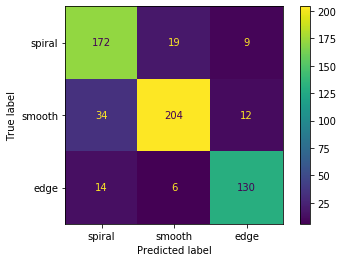

In [30]:
from sklearn.metrics import  ConfusionMatrixDisplay

cm = confusion_matrix(true_classes, predicted_classes, normalize=None)
cmd = ConfusionMatrixDisplay(cm, display_labels=['spiral', 'smooth', 'edge'])
cmd.plot()

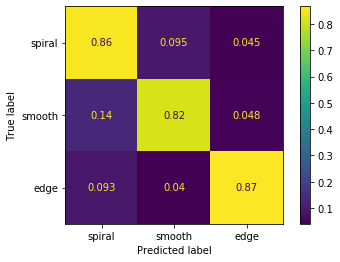

In [31]:
cm1 = confusion_matrix(true_classes, predicted_classes, normalize='true')
cmd1 = ConfusionMatrixDisplay(cm1, display_labels=['spiral', 'smooth', 'edge'])
cmd1.plot()